In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Housing.csv')
df = df.sample(frac = 1, random_state = 3)
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
399,400,85000.0,7231,3,1,2,yes,yes,yes,no,yes,0,yes
251,252,52000.0,3520,2,2,1,yes,no,yes,no,no,0,no
455,456,75000.0,3800,3,1,2,yes,yes,yes,no,no,1,yes
466,467,54000.0,2856,3,1,3,yes,no,no,no,no,0,yes
129,130,127000.0,4600,3,2,2,yes,yes,no,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,89500.0,6000,4,1,3,yes,yes,yes,no,no,0,yes
422,423,61100.0,3400,3,1,2,yes,no,yes,no,no,2,yes
119,120,116000.0,6840,5,1,2,yes,yes,yes,no,yes,1,no
256,257,71000.0,4410,4,3,2,yes,no,yes,no,no,2,no


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 399 to 249
Data columns (total 13 columns):
Unnamed: 0    546 non-null int64
price         546 non-null float64
lotsize       546 non-null int64
bedrooms      546 non-null int64
bathrms       546 non-null int64
stories       546 non-null int64
driveway      546 non-null object
recroom       546 non-null object
fullbase      546 non-null object
gashw         546 non-null object
airco         546 non-null object
garagepl      546 non-null int64
prefarea      546 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 59.7+ KB


In [41]:
df = df.drop('Unnamed: 0', axis = 1)

In [42]:
obj_cols = list(df.select_dtypes(include = 'object').columns)
obj_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [43]:
for col in obj_cols: 
    print(df[col].value_counts())

yes    469
no      77
Name: driveway, dtype: int64
no     449
yes     97
Name: recroom, dtype: int64
no     355
yes    191
Name: fullbase, dtype: int64
no     521
yes     25
Name: gashw, dtype: int64
no     373
yes    173
Name: airco, dtype: int64
no     418
yes    128
Name: prefarea, dtype: int64


In [44]:
df = pd.get_dummies(df, columns = obj_cols, drop_first = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 399 to 249
Data columns (total 12 columns):
price           546 non-null float64
lotsize         546 non-null int64
bedrooms        546 non-null int64
bathrms         546 non-null int64
stories         546 non-null int64
garagepl        546 non-null int64
driveway_yes    546 non-null uint8
recroom_yes     546 non-null uint8
fullbase_yes    546 non-null uint8
gashw_yes       546 non-null uint8
airco_yes       546 non-null uint8
prefarea_yes    546 non-null uint8
dtypes: float64(1), int64(5), uint8(6)
memory usage: 33.1 KB


In [46]:
df.isnull().sum()

price           0
lotsize         0
bedrooms        0
bathrms         0
stories         0
garagepl        0
driveway_yes    0
recroom_yes     0
fullbase_yes    0
gashw_yes       0
airco_yes       0
prefarea_yes    0
dtype: int64

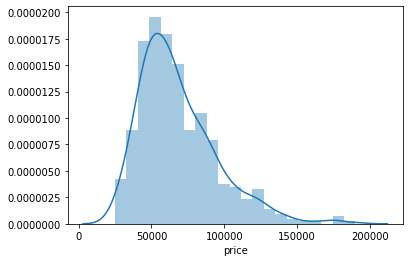

In [47]:
sns.distplot(df['price'])

In [48]:
df['price'].describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [49]:
df['lotsize'].describe()

count      546.000000
mean      5150.265568
std       2168.158725
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: lotsize, dtype: float64

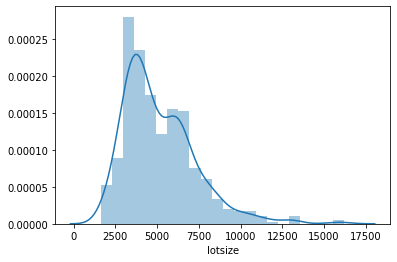

In [50]:
sns.distplot(df['lotsize'])

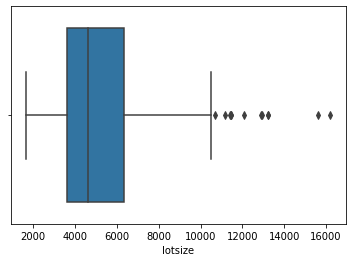

In [51]:
sns.boxplot(df['lotsize'])

Outliers:
    1. It is critical for statistics.
    2. With outliers, model can be biased.
    

### Statistical model to predict Price

In [52]:
import statsmodels.api as sm

In [53]:
y = df['price']
X = df.drop('price', axis = 1) 
Xc = sm.add_constant(X)

C:\Users\Loki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])], index = Xc.columns, columns = ['VIF'])

,VIF
const,26.682009
lotsize,1.321632
bedrooms,1.365633
bathrms,1.282494
stories,1.478584
garagepl,1.200839
driveway_yes,1.163091
recroom_yes,1.210501
fullbase_yes,1.316543
gashw_yes,1.038246


In [55]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          6.18e-122
Time:                        15:02:04   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
lotsize          3.5463      0.350     10.124      0.000       2.858       4.234
bedrooms      1832.0035   1047.000      1.750      0.081    -224.741    3888.748
bathrms       1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
stories       6556.9457    925.290      7.086      0.000    4739.291    8374.600
garagepl      4244.8290    840.544      5.050      0.000    2593.650    5896.008
driveway_yes  6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
recroom_yes   4511.2838   1899.958      2.374      0.018     778.976    8243.592
fullbase_yes  5452.3855   1588.024      3.433      0.001    2332.845    8571.926
gashw_yes     1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
airco_yes     1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
prefarea_yes  9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Bedrooms is the only feature not significant (prob > 0.05)

In [56]:
Xc = Xc.drop('bedrooms', axis = 1)
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     109.2
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          2.62e-122
Time:                        15:02:04   Log-Likelihood:                -6035.7
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     535   BIC:                         1.214e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -497.3484   2749.207     -0.181      0.857   -5897.912    4903.215
lotsize          3.5959      0.350     10.279      0.000       2.909       4.283
bathrms       1.492e+04   1454.244     10.262      0.000    1.21e+04    1.78e+04
stories       7128.7990    867.317      8.219      0.000    5425.034    8832.564
garagepl      4355.3216    839.782      5.186      0.000    2705.647    6004.997
driveway_yes  6259.6177   2034.464      3.077      0.002    2263.101    1.03e+04
recroom_yes   4440.4102   1903.182      2.333      0.020     701.783    8179.037
fullbase_yes  5846.5080   1574.995      3.712      0.000    2752.576    8940.440
gashw_yes     1.295e+04   3223.082      4.018      0.000    6617.994    1.93e+04
airco_yes     1.261e+04   1557.938      8.091      0.000    9545.496    1.57e+04
prefarea_yes  9431.7782   1671.923      5.641      0.000    6147.438    1.27e+04
==============================================================================
Omnibus:                       98.563   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.305
Skew:                           0.887   Prob(JB):                     3.32e-59
Kurtosis:                       5.948   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality of Residuals

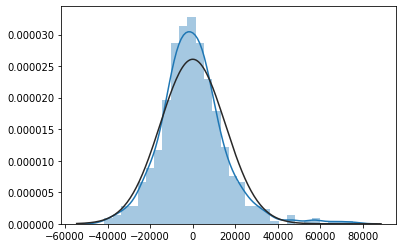

In [57]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid, fit = norm)

In [58]:
import scipy.stats as stats
stats.probplot(model.resid)


((array([-3.01884660e+00, -2.73920016e+00, -2.58212353e+00, -2.47082970e+00,
         -2.38367879e+00, -2.31157505e+00, -2.24979960e+00, -2.19557711e+00,
         -2.14713190e+00, -2.10325667e+00, -2.06309192e+00, -2.02600324e+00,
         -1.99150853e+00, -1.95923249e+00, -1.92887709e+00, -1.90020152e+00,
         -1.87300833e+00, -1.84713352e+00, -1.82243935e+00, -1.79880896e+00,
         -1.77614232e+00, -1.75435312e+00, -1.73336635e+00, -1.71311638e+00,
         -1.69354547e+00, -1.67460252e+00, -1.65624210e+00, -1.63842361e+00,
         -1.62111063e+00, -1.60427036e+00, -1.58787314e+00, -1.57189207e+00,
         -1.55630265e+00, -1.54108255e+00, -1.52621129e+00, -1.51167009e+00,
         -1.49744169e+00, -1.48351014e+00, -1.46986072e+00, -1.45647977e+00,
         -1.44335465e+00, -1.43047356e+00, -1.41782554e+00, -1.40540035e+00,
         -1.39318842e+00, -1.38118080e+00, -1.36936908e+00, -1.35774539e+00,
         -1.34630229e+00, -1.33503283e+00, -1.32393040e+00, -1.31298882e+00,

In [59]:
## H0 Data is normal
## H1 DAta is not normal

stats.jarque_bera(model.resid)

(269.30481125198565, 0.0)

JB test indicates that residual are not normal

In [60]:
ly = np.log(y)

In [62]:
model = sm.OLS(ly, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          5.13e-123
Time:                        15:02:28   Log-Likelihood:                 71.076
No. Observations:                 546   AIC:                            -120.2
Df Residuals:                     535   BIC:                            -72.82
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0913      0.038    264.303      0.000      10.016      10.166
lotsize       5.149e-05   4.86e-06     10.598      0.000    4.19e-05     6.1e-05
bathrms          0.1787      0.020      8.848      0.000       0.139       0.218
stories          0.1029      0.012      8.542      0.000       0.079       0.127
garagepl         0.0528      0.012      4.528      0.000       0.030       0.076
driveway_yes     0.1227      0.028      4.343      0.000       0.067       0.178
recroom_yes      0.0722      0.026      2.732      0.007       0.020       0.124
fullbase_yes     0.1067      0.022      4.879      0.000       0.064       0.150
gashw_yes        0.1805      0.045      4.033      0.000       0.093       0.268
airco_yes        0.1775      0.022      8.205      0.000       0.135       0.220
prefarea_yes     0.1283      0.023      5.524      0.000       0.083       0.174
==============================================================================
Omnibus:                        7.058   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.326
Skew:                          -0.160   Prob(JB):                       0.0156
Kurtosis:                       3.514   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
## H0 Data is normal
## H1 DAta is not normal

stats.jarque_bera(model.resid)

(8.325936602162214, 0.015561298678578805)

### Test Homoscedasticity

In [64]:
y_pred = model.predict(Xc)

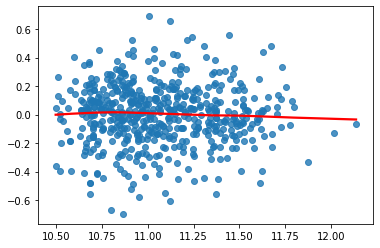

In [65]:
sns.regplot(x = y_pred,  y = model.resid, lowess = True, line_kws = {'color': 'red'})

In [66]:
import statsmodels.stats.api as sms

## H0: residual Variance is constant
## H1: residual variance is not constant

test = sms.het_goldfeldquandt(y = model.resid, x = Xc)
test


(0.8284844177542069, 0.9357727109130592, 'increasing')

Probability value suggests that residual variance is constant

### Test for Autocorrelation

C:\Users\Loki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


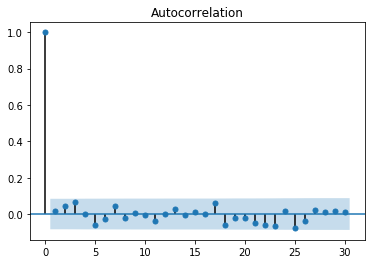

In [68]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags = 30)
acf.show()

DW = 1.96 indicates that there is no autocorrelation

### Test of Linearity

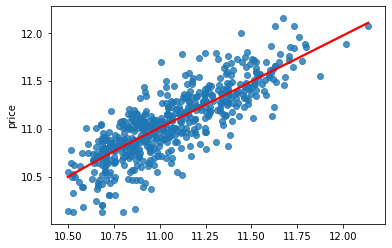

In [73]:
sns.regplot(x = y_pred, y = ly, lowess = True, line_kws = {'color' : 'red'})
plt.show()

In [74]:
import statsmodels.api as sm


In [75]:
sm.stats.diagnostic.linear_rainbow(res = model)

(1.1445347285612018, 0.13545993609138263)

In [76]:
### H0 residuals exhibit linearity
### H1 residuals exhibit non-linearity

# Null hypothesis accepted and it's concluded that residuals are linear.

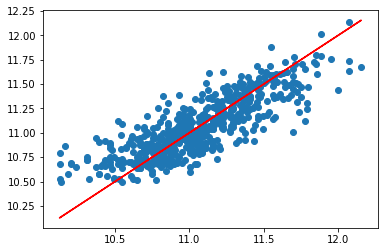

In [80]:
plt.scatter(ly, y_pred)
plt.plot(ly, ly, 'r')
plt.show()